In [7]:
import pandas as pd

df = pd.read_csv('http://users.stat.ufl.edu/~winner/data/brainhead.dat', sep='\s+', header=None, skiprows=1)

[Description](http://users.stat.ufl.edu/~winner/data/brainhead.txt)

In [8]:
df.columns = ['gender', 'age range', 'head size', 'brain weight']

In [9]:
head_size_and_brain_weight = df[['head size', 'brain weight']]

In [10]:
head_size_and_brain_weight.head()

,head size,brain weight
0,3738,1297
1,4261,1335
2,3777,1282
3,4177,1590
4,3585,1300


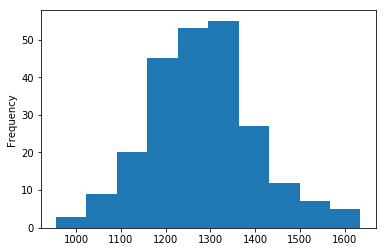

In [16]:
head_size_and_brain_weight['brain weight'].plot.hist()

In [12]:
head_size_and_brain_weight['brain weight'].describe()

count     236.000000
mean     1281.826271
std       119.509278
min       955.000000
25%      1206.500000
50%      1280.000000
75%      1350.000000
max      1635.000000
Name: brain weight, dtype: float64

SD = $\frac{\sum (x - \mu)^2}{N}$

### Seeing if adding a variable does any better

In [18]:
first_five = head_size_and_brain_weight[0:5]
first_five

,head size,brain weight
0,3738,1297
1,4261,1335
2,3777,1282
3,4177,1590
4,3585,1300


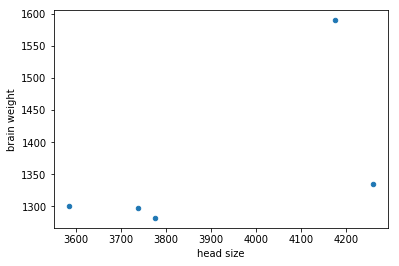

In [14]:
first_five.plot.scatter('head size', 'brain weight')

$Cov(X, Y) = \frac{\sum^n_{i = 1} (x_i - \bar{x})(y_i - \bar{y})}{n}$

![](./resources/covariance.png)

In [ ]:
1, 9, 12, 4, 5, 2

In [ ]:
(1, 9), (12, 4), (5, 2)-> 1*9 + 12*4 + 5*2 = 67

In [ ]:
(9, 12), (4, 5) + 1*2 = 130

In [10]:
first_five['head size'].mean()

3907.6

In [11]:
first_five['brain weight'].mean()

1360.8

In [20]:
first_five['head size'] - first_five['head size'].mean()

0   -169.6
1    353.4
2   -130.6
3    269.4
4   -322.6
Name: head size, dtype: float64

In [36]:
import numpy as np

head_size_from_mean = first_five['head size'] - 3907.6
brain_weight_from_mean = first_five['brain weight'] - 1360.8
paired_data = np.column_stack([head_size_from_mean, brain_weight_from_mean])
# our_cov = sum(paired_data[:, 0] * paired_data[:, 1])/4
# our_cov

# paired_data
paired_data = np.column_stack([head_size_from_mean, brain_weight_from_mean])

# len(brain_weight_from_mean)
sum(paired_data[:, 0]*paired_data[:, 1])/4

23338.65

In [41]:
import numpy as np
cov_calculation = np.cov(first_five['head size'], first_five['brain weight'])[0][1]
cov_calculation

23338.649999999998

### Correlation of coefficient

#### Get basic data

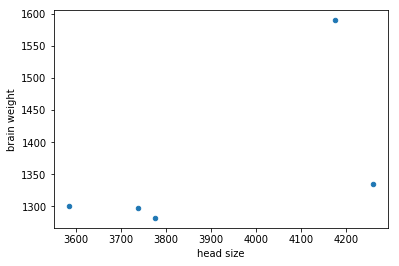

In [15]:
first_five.plot.scatter('head size', 'brain weight')

In [21]:
first_five['head size'].mean() 
# 3907.6
first_five['head size'].std()
# 294.68593451333913

294.68593451333913

In [22]:
first_five['brain weight'].mean()
# 1360.8

first_five['brain weight'].std()
# 129.59050891172546

129.59050891172546

#### now calculate the correlation coeffiicent

 $Corr(X, Y) =\frac{1}{n - 1} * {\sum^n_{i = 1} \frac{(x_i - \bar{x})}{s_x}} \frac{(y_i - \bar{y})}{s_y}$

* So it's the average product of z scores 


![](./resources/calc-r.png)

* think of the first data point, when one goes down the other goes down, which contributes to a positive r

![](./resources/calc-r.png)

In [100]:
head_size_var = np.var(first_five['head size'])
brain_weight_var = np.var(first_five['brain weight'])
cov_calculation/math.sqrt(head_size_var*brain_weight_var)

0.7639292543531307

In [65]:
np.corrcoef(head_size_and_brain_weight['brain weight'], head_size_and_brain_weight['head size'])[0, 1]

0.79548592019541

* Note that it only measures a linear relationship it answers the question of how well a line describes the relationship



In [73]:
head_size_and_brain_weight['brain squared'] = head_size_and_brain_weight['brain weight']**4

/Users/flatironschool/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


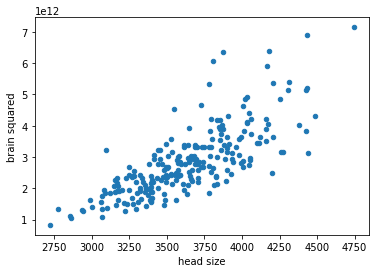

In [75]:
head_size_and_brain_weight.plot.scatter('head size', 'brain squared')

In [6]:
import scipy.stats as stats
import numpy as np
x = np.arange(0, 11)
y = np.power(np.arange(0, 11), 5)
stats.pearsonr(y, x)

(0.814229885110622, 0.0022808980153846553)